## I have included most of the EDA and complete modelling + Statistical test required in this notebook, however for detailed EDA please refer 'ketto_eda.html' file

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import OrderedDict

In [129]:
main_data=pd.read_csv('./Autos_train_data.csv',encoding='latin-1',parse_dates=['lastSeen'],dayfirst=True,infer_datetime_format=True)

C:\Users\uesr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
car_data = main_data.copy()

# five point summary of car data

In [292]:
car_data.describe()

,price,powerPS,kilometer,nrOfPictures,car_age
count,177249.000000,177249.000000,177249.000000,177249.0,177249.000000
mean,5790.095967,113.882634,125415.855661,0.0,13.059549
std,6918.577367,67.470692,39892.785095,0.0,7.063561
min,120.000000,0.000000,5000.000000,0.0,0.000000
25%,1250.000000,75.000000,100000.000000,0.0,8.000000
50%,3199.000000,109.000000,150000.000000,0.0,13.000000
75%,7500.000000,150.000000,150000.000000,0.0,17.000000
max,37091.000000,343.000000,150000.000000,0.0,66.000000


# type of variables

In [131]:
car_data.dtypes

dateCrawled                    object
name                           object
seller                         object
offerType                      object
price                         float64
abtest                         object
vehicleType                    object
yearOfRegistration            float64
gearbox                        object
powerPS                       float64
model                          object
kilometer                      object
monthOfRegistration           float64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated                    object
nrOfPictures                  float64
postalCode                    float64
lastSeen               datetime64[ns]
dtype: object

In [132]:
# car_data.dateCrawled=pd.to_datetime(car_data.dateCrawled,dayfirst=True,errors='coerce')

In [133]:
car_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-16 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-16 0:00,0.0,70435.0,2016-04-07 03:16:00
1,24-03-16 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,24-03-16 0:00,0.0,66954.0,2016-04-07 01:46:00
2,14-03-16 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-16 0:00,0.0,90480.0,2016-04-05 12:47:00
3,17-03-16 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-16 0:00,0.0,91074.0,2016-03-17 17:40:00
4,31-03-16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-16 0:00,0.0,60437.0,2016-04-06 10:17:00


## Removing data before 1950 and after 2016 

In [134]:
car_data = car_data[
        (car_data.yearOfRegistration <= 2016) 
      & (car_data.yearOfRegistration >= 1950) ]

## new variable car_age represents age of car

In [135]:
car_data['car_age']=car_data.lastSeen.dt.year - car_data.yearOfRegistration

## dropping all non-relevant columns

In [136]:
drop_cols=['dateCrawled','name','yearOfRegistration','monthOfRegistration','dateCreated','postalCode','lastSeen']
car_data.drop(columns=drop_cols,axis=1,inplace=True)

## separating out all numerical and chracter columns

In [137]:
char_col=[]
num_col=[]
for col in list(car_data.columns):
    if car_data[col].dtype=='object':
        char_col.append(col)
    else:
        num_col.append(col)

## for variable model i have replcaed model with other_cat for whom count is less than 1000. 

In [138]:
remove_these=[]
keep_these=[]
for mod, val in dict(car_data.model.value_counts()).items():
    if val <=1000:
        remove_these.append(mod)
    else:
        keep_these.append(mod)               
car_data.loc[car_data.model.isin(remove_these),'model'] = 'other_cat'

## dropping other irrelevant columns

In [139]:
char_col.remove('kilometer')
char_col.remove('seller')
char_col.remove('offerType')
num_col.remove('nrOfPictures')

In [140]:
num_col.append('kilometer')

In [141]:
char_col

['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']

## running value_counts to understand distribution of categorical variables.

In [142]:
for col in char_col:
    print('column_name is ',col)
    print(car_data[col].value_counts())
    print('----------------------------------------')    

column_name is  abtest
test       94638
control    87766
Name: abtest, dtype: int64
----------------------------------------
column_name is  vehicleType
limousine     48851
kleinwagen    41030
kombi         34622
bus           15409
cabrio        11769
coupe          9645
suv            7526
andere         1737
Name: vehicleType, dtype: int64
----------------------------------------
column_name is  gearbox
manuell      134797
automatik     38350
Name: gearbox, dtype: int64
----------------------------------------
column_name is  model
other_cat      47113
golf           14388
andere         13251
3er            10210
polo            6433
corsa           6101
astra           5293
passat          5211
a4              5124
c_klasse        4378
5er             4246
e_klasse        3819
a3              3191
a6              3041
focus           2929
fiesta          2843
transporter     2697
2_reihe         2414
twingo          2373
fortwo          2131
vectra          2084
a_klasse        20

In [143]:
car_data.abtest.value_counts()

test       94638
control    87766
Name: abtest, dtype: int64

## Since abtest type benzin is related to only single observation i am dropping the same. 

In [144]:
car_data.drop(car_data.loc[car_data['abtest']=='benzin',:].index,inplace=True)

## dropping na values based on abtest and brand(2 observation).

In [145]:
car_data.dropna(subset=['abtest','brand'],inplace=True)

In [146]:
car_data.notRepairedDamage.value_counts()

nein    131010
ja       17878
Name: notRepairedDamage, dtype: int64

## missing value as percent of the data.

In [147]:
for i,j in dict(car_data[char_col].isna().sum()).items():
    if j!=0:
        print('variable name is {} and total missing values are {:.2f} of the data'.format(i,j/len(car_data)*100))

variable name is vehicleType and total missing values are 6.48 of the data
variable name is gearbox and total missing values are 5.07 of the data
variable name is model and total missing values are 5.16 of the data
variable name is fuelType and total missing values are 7.79 of the data
variable name is notRepairedDamage and total missing values are 18.37 of the data


## there were some zeroes in price, i am removing these as it will badly affect my regression line.

In [148]:
'total zeroes in car_data is {:.2f} %'.format(car_data.loc[car_data.price==0,:].shape[0]/car_data.shape[0]*100)

'total zeroes in car_data is 2.83 %'

In [149]:
car_data= car_data.loc[car_data.price!=0,:]

In [150]:
car_data[num_col].head()

,price,powerPS,car_age,kilometer
0,480.0,0.0,23.0,150000
1,18300.0,190.0,5.0,125000
2,9800.0,163.0,12.0,125000
3,1500.0,75.0,15.0,150000
4,3600.0,69.0,8.0,90000


In [151]:
num_col

['price', 'powerPS', 'car_age', 'kilometer']

## outlier capping based on 1 and 99 percentile.

In [152]:
def out_capp(data, cols):
    for col in cols:
        data.loc[(data[col] < data[col].quantile(0.01)),col] = data[col].quantile(0.01) 
        data.loc[(data[col] > data[col].quantile(0.99)),col] = data[col].quantile(0.99)
    return data

In [153]:
car_data = out_capp(car_data,cols=['price','powerPS'])

In [154]:
# car_data = car_data[
#         (car_data.yearOfRegistration <= 2016) 
#       & (car_data.yearOfRegistration >= 1950) 
#       & (car_data.price >= car_data.price.quantile(0.01)) 
#       & (car_data.price <= car_data.price.quantile(0.99)) 
#       & (car_data.powerPS >= car_data.powerPS.quantile(0.01)) 
#       & (car_data.powerPS <= car_data.powerPS.quantile(0.99))]

In [155]:
car_data.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,nrOfPictures,car_age
0,privat,Angebot,480.0,test,NaN,manuell,0.0,golf,150000,benzin,volkswagen,NaN,0.0,23.0
1,privat,Angebot,18300.0,test,coupe,manuell,190.0,NaN,125000,diesel,audi,ja,0.0,5.0
2,privat,Angebot,9800.0,test,suv,automatik,163.0,other_cat,125000,diesel,jeep,NaN,0.0,12.0
3,privat,Angebot,1500.0,test,kleinwagen,manuell,75.0,golf,150000,benzin,volkswagen,nein,0.0,15.0
4,privat,Angebot,3600.0,test,kleinwagen,manuell,69.0,fabia,90000,diesel,skoda,nein,0.0,8.0


In [156]:
car_data.kilometer = pd.to_numeric(car_data.kilometer)

## Dummy variable creation for categorical variables.

In [157]:
dummy_data = pd.get_dummies(data=car_data[char_col],columns=char_col,dummy_na=True)

In [158]:
final_data=pd.concat(objs=[car_data[num_col],dummy_data],axis=1)

In [159]:
final_data.head()

,price,powerPS,car_age,kilometer,abtest_control,abtest_test,abtest_nan,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,...,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,brand_nan,notRepairedDamage_ja,notRepairedDamage_nein,notRepairedDamage_nan
0,480.0,0.0,23.0,150000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,18300.0,190.0,5.0,125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9800.0,163.0,12.0,125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1500.0,75.0,15.0,150000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,3600.0,69.0,8.0,90000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [161]:
final_data[num_col].corr()

,price,powerPS,car_age,kilometer
price,1.000000,0.554979,-0.405519,-0.445885
powerPS,0.554979,1.000000,-0.203305,-0.024536
car_age,-0.405519,-0.203305,1.000000,0.278858
kilometer,-0.445885,-0.024536,0.278858,1.000000


## using kmeans clustering to check segments in data

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

# Kmeans with StandardScaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(final_data[num_col])

scaled_data=scale.transform(final_data[num_col])

kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_data)
y_label=kmeans.predict(scaled_data)

Counter(y_label)

## PCA for data visualization with cluster(K means)

In [ ]:
pca = PCA(n_components=2)
pca.fit(final_data[num_col].T)

In [191]:
sum(pca.explained_variance_ratio_)

0.9999998847650682

C:\Users\uesr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\uesr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


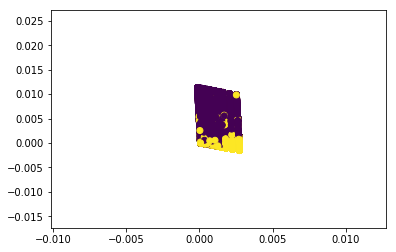

In [183]:
transformed_data=pca.components_.T

%matplotlib inline
plt.scatter(transformed_data[:,0],transformed_data[:,1],c=y_label)

In [237]:
pca_data=pd.DataFrame({'pc_1':pd.Series(transformed_data[:,0]),'pc_2':pd.Series(transformed_data[:,0]),'cluster':pd.Series(y_label)}).sample(10000)

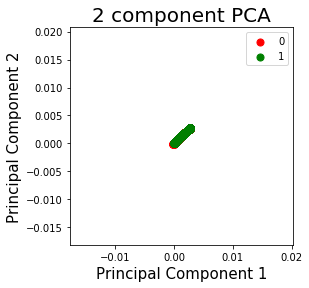

In [241]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = pca_data['cluster'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'pc_1']
               , pca_data.loc[indicesToKeep, 'pc_1']
               , c = color
               , s = 50)
ax.legend(targets)


## corrlation plot between numerical variables.

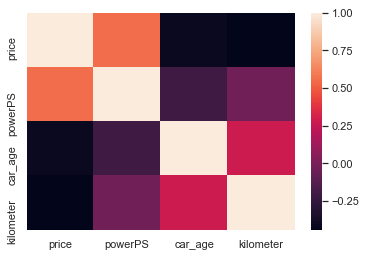

In [294]:
import seaborn as sns; sns.set()
ax = sns.heatmap(final_data[num_col].corr())

In [300]:
plotting_data=car_data.copy()
plotting_data.dropna(inplace=True)

## Understanding histogram of categorical variables

abtest
test       68421
control    63343
Name: abtest, dtype: int64


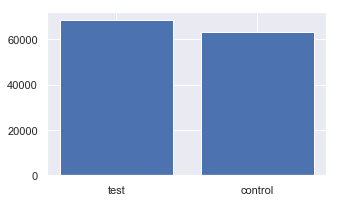

vehicleType
limousine     38476
kleinwagen    29792
kombi         27064
bus           12606
cabrio         9492
Name: vehicleType, dtype: int64


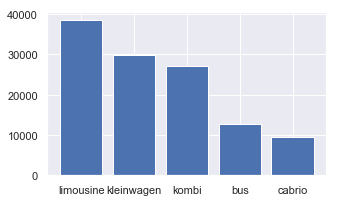

gearbox
manuell      100834
automatik     30930
Name: gearbox, dtype: int64


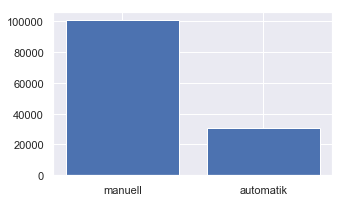

model
other_cat    36960
golf         10463
andere       10287
3er           7912
polo          4467
Name: model, dtype: int64


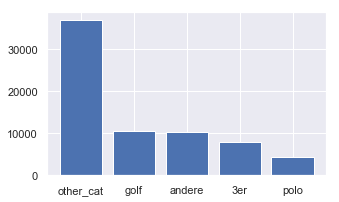

fuelType
benzin    85265
diesel    44137
lpg        1939
cng         251
hybrid      106
Name: fuelType, dtype: int64


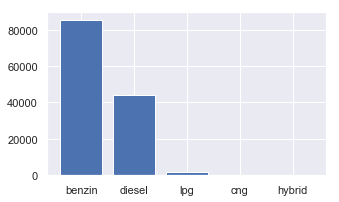

brand
volkswagen       27221
bmw              15386
mercedes_benz    13724
opel             13246
audi             12518
Name: brand, dtype: int64


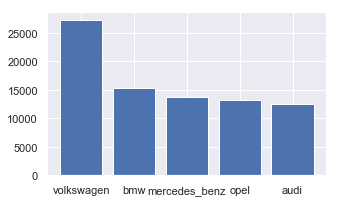

notRepairedDamage
nein    118150
ja       13614
Name: notRepairedDamage, dtype: int64


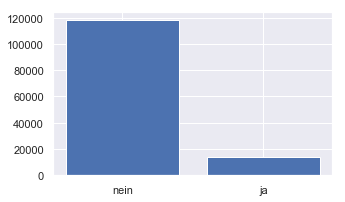

In [310]:
for c in char_col:
    v = plotting_data[c].unique()
    
    g = plotting_data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

## For normalizing target variable i have used square root transformation

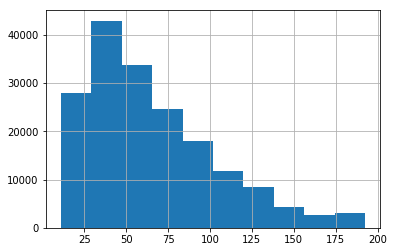

In [160]:
final_data.price.apply(np.sqrt).hist()

In [242]:
# from scipy import stats
# stats.shapiro(final_data.price.apply(np.sqrt))

C:\Users\uesr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9202556014060974, 0.0)

In [281]:
Y = final_data['price'].apply(np.sqrt)
X = final_data.drop(['price'], axis='columns', inplace=False)

## Splitting data into train and test

In [282]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r


test_size = .30

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(124074, 108) (53175, 108) (124074,) (53175,)


## Linear regression with R2 of 72 %

In [283]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7160135359762891

## Calculating r square and adjusted r square for training data

In [284]:
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R square is {:.3f} and adjusted r square is {:.3f}'.format(r_squared, adjusted_r_squared))

R square is 0.716 and adjusted r square is 0.716


## overall VIF score

In [285]:
'overall VIF for the model is {:.2f}'.format(1/(1-r_squared))

'overall VIF for the model is 3.52'

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[num_col[1:]].values, i) for i in range(X_train[num_col[1:]].shape[1])]
vif["features"] = X[num_col[1:]].columns

In [271]:
vif.round(1)

,VIF Factor,features
0,3.0,powerPS
1,4.4,car_age
2,6.6,kilometer


In [275]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[list(dummy_data.columns)[:50]].values, i) for i in range(X_train[list(dummy_data.columns)[:50]].shape[1])]
vif["features"] = X[list(dummy_data.columns)[:50]].columns

C:\Users\uesr\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [286]:
vif.round(1).head(10)

,VIF Factor,features
0,3.411368e+08,abtest_control
1,1.538157e+08,abtest_test
2,NaN,abtest_nan
3,3.344671e+12,vehicleType_andere
4,1.819696e+07,vehicleType_bus
5,1.873339e+11,vehicleType_cabrio
6,3.516240e+11,vehicleType_coupe
7,2.444268e+10,vehicleType_kleinwagen
8,1.423192e+10,vehicleType_kombi
9,2.914216e+10,vehicleType_limousine


## sapiro wilk test for normality

In [244]:
from scipy import stats
stats.shapiro(y_train - reg.predict(X_train))

C:\Users\uesr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9302718043327332, 0.0)

# Top features based on std_beta value

In [236]:
std_coef=abs(reg.coef_)/sum(abs(reg.coef_))
pd.DataFrame({'var':list(X_val.columns),'params':std_coef}).sort_values(by='params',ascending=False).head(20)

,var,params
90,brand_porsche,0.068013
97,brand_sonstige_autos,0.037024
50,model_transporter,0.036462
82,brand_land_rover,0.032560
14,vehicleType_nan,0.024493
80,brand_lada,0.024209
65,brand_audi,0.022327
66,brand_bmw,0.021968
71,brand_daewoo,0.021769
85,brand_mini,0.021438


In [291]:
pd.DataFrame({'act_val':y_train,'res':res}).to_csv('./res_plot.csv',index=False)

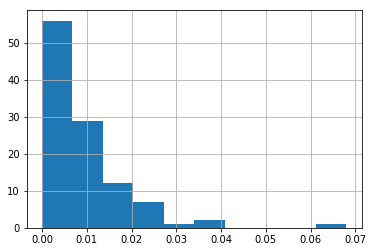

In [227]:
pd.Series(reg_coef.params/sum(reg_coef.params)).hist()

In [214]:
pd.DataFrame({'var':list(X_val.columns),'params':reg.coef_}).to_csv('./linear_params.csv',index=False)

## Grid search based on random forest

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.7min finished


In [171]:
print(gs.best_score_)
print(gs.best_params_)

0.8470958991309735
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [172]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.84


## saving trained model.

In [173]:
with open('./rf_model.pkl', 'wb') as f:
    pickle.dump(forest, f)
with open('./rf_model.pkl', 'rb') as f:
    rf = pickle.load(f)

In [174]:
feat_dict = dict(zip(list(X_train.columns),forest.feature_importances_))

In [175]:
sorted_dict = sorted(feat_dict.items(), key=lambda x: x[1],reverse=True)

## top variable based on variable importance.

In [181]:
for item in sorted_dict[:15]:
    print('feature name is {} and importance is {:.3f}.'.format(item[0],item[1]))

feature name is car_age and importance is 0.574.
feature name is powerPS and importance is 0.285.
feature name is kilometer and importance is 0.042.
feature name is vehicleType_nan and importance is 0.027.
feature name is notRepairedDamage_nein and importance is 0.010.
feature name is model_transporter and importance is 0.009.
feature name is vehicleType_cabrio and importance is 0.009.
feature name is brand_porsche and importance is 0.007.
feature name is notRepairedDamage_ja and importance is 0.007.
feature name is vehicleType_kleinwagen and importance is 0.004.
feature name is fuelType_diesel and importance is 0.003.
feature name is gearbox_automatik and importance is 0.002.
feature name is brand_mercedes_benz and importance is 0.002.
feature name is brand_audi and importance is 0.002.
feature name is brand_volkswagen and importance is 0.002.


In [182]:
pd.DataFrame(sorted_dict[:15])

,0,1
0,car_age,0.573998
1,powerPS,0.284864
2,kilometer,0.042334
3,vehicleType_nan,0.026672
4,notRepairedDamage_nein,0.010009
5,model_transporter,0.008937
6,vehicleType_cabrio,0.008857
7,brand_porsche,0.006639
8,notRepairedDamage_ja,0.006506
9,vehicleType_kleinwagen,0.003746


## checking rank order between predicted and actual values(Linear regression).

In [177]:
test_data=pd.concat([X_val, y_val],axis=1)

test_data['quantile'] = pd.qcut(test_data.price, 10, labels=False)

act_val=test_data.groupby('quantile').price.mean()

test_data['pred_val']=reg.predict(X_val)

preds=test_data.groupby('quantile').pred_val.mean()

pd.concat([act_val,preds],axis=1)

,price,pred_val
quantile,,
0,18.845819,31.055769
1,28.993231,36.866763
2,36.143953,42.766538
3,43.198651,49.112390
4,51.943443,57.124594
5,62.080275,64.861547
6,73.768068,72.890793
7,87.685495,83.158730
8,107.686499,96.281363


## checking rank order between predicted and actual values(Random forest).

In [178]:
test_data=pd.concat([X_val, y_val],axis=1)

test_data['quantile'] = pd.qcut(test_data.price, 10, labels=False)

act_val=test_data.groupby('quantile').price.mean()

test_data['pred_val']=forest.predict(X_val)

preds=test_data.groupby('quantile').pred_val.mean()

pd.concat([act_val,preds],axis=1)

,price,pred_val
quantile,,
0,18.845819,31.713226
1,28.993231,34.673909
2,36.143953,39.094776
3,43.198651,44.282120
4,51.943443,51.863865
5,62.080275,60.631266
6,73.768068,71.289080
7,87.685495,84.535979
8,107.686499,103.107686
